# Lab 2 Script

**Name:** Ryan Baig

**Due:** Sunday, 4/6

### Part 1
---

In [1]:
# 1: Make simple calculation of time for mass to reach bottom without drag

import numpy as np 
import matplotlib.pyplot as plt

y0 = 4000 # 4 km = 4000 m
g0 = 9.81 #approximate gravitational acceleration

tf1 = np.sqrt((2*y0)/g0)

print("Time for mass to fall with no drag:", tf1)

Time for mass to fall with no drag: 28.55686245854129


#### Question 2: Reducing the Second Order Equation

To simplify the given equation:
$$
\frac{d^2 y}{dt^2} = -g + \alpha \left| \frac{dy}{dt} \right|^{\gamma}
$$

I'll first reduce this. This can be done by defining the first derivative and then plugging in this redefined $\frac{dy}{dt}$ into the original second order equation:
$$
v = \frac{dy}{dt}
$$
And substitue that in:
$$
\frac{dv}{dt} = -g + \alpha \left| v \right|^{\gamma}
$$

And that gives us a system of two equations:
$$
v = \frac{dy}{dt} \,\,\,\,\,\,\, and \,\,\,\,\,\,\, \frac{dv}{dt} = -g + \alpha \left| v \right|^{\gamma}
$$



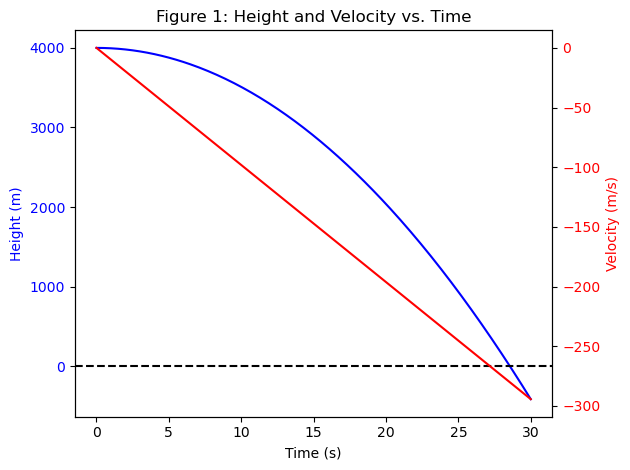

In [2]:
#3: Solve Equation 1 using solve_ivp

from scipy.integrate import solve_ivp

def d2ydt2(t, s, alpha, gamma, g=9.81):
    y, v = s
    dydt = v
    dvdt = -g+alpha*(np.abs(v))**gamma
    return [dydt, dvdt]

Y_stop = 0

alpha1 = 0
gamma1 = 1

t0 = 0
tf = 30
v0 = 0 
tt = np.linspace(t0, tf, 301)

soln = solve_ivp(fun = d2ydt2, args=(alpha1, gamma1), t_span=(t0,tf), t_eval=tt, y0=[y0, v0])

yy = soln.y[0]
vv = soln.y[1]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(tt, yy, color = "blue")
ax2.plot(tt, vv, color = "red")

ax1.set_xlabel("Time (s)")

ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_ylabel("Height (m)", color="blue")

ax2.tick_params(axis="y", labelcolor="red")
ax2.set_ylabel("Velocity (m/s)", color="red")

ax1.axhline(0, ls="--", c="black")
ax1.set_title("Figure 1: Height and Velocity vs. Time")
plt.tight_layout();

In [3]:
#4: Determine event and calculate time

def crash(t, s, alpha, gamma):
    return s[0] - Y_stop

soln1 = solve_ivp(fun = d2ydt2, args=(alpha1, gamma1), t_span=(t0,tf), t_eval=tt, y0=[y0, v0], events=crash)
#print(soln1)
print(f"The test mass would reach the bottom at {soln1.t_events[0][0]} s")

#the analytic and numerical look the same!!

The test mass would reach the bottom at 28.5568624585413 s


### Part 2
---

Accounting for changing gravity, the test mass would reach the bottom at 28.55835511190966 s


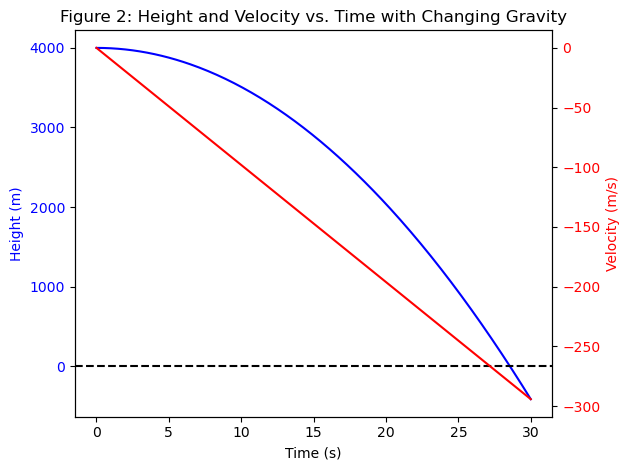

In [4]:
g0 = 9.81
R_earth = 6.3781e6  #radius of Earth, in meters

r0 = R_earth

def g(y):
    r = R_earth - 4000 + y
    return g0*(r/R_earth)

def d2ydt2_pt2(t, s, alpha, gamma):
    y, v = s
    dydt = v
    dvdt = -g(y)+alpha*(np.abs(v))**gamma
    return [dydt, dvdt]
    
soln2 = solve_ivp(fun = d2ydt2_pt2, args=(alpha1, gamma1), t_span=(t0,tf), t_eval=tt, y0=[y0, v0], events=crash)

print(f"Accounting for changing gravity, the test mass would reach the bottom at {soln2.t_events[0][0]} s")

yy2 = soln2.y[0]
vv2 = soln2.y[1] 

fig, ax3 = plt.subplots()
ax4 = ax3.twinx()

ax3.plot(tt, yy2, c="blue")
ax4.plot(tt, vv2, c="red")
ax3.axhline(0, ls="--", c="black")

ax3.set_xlabel("Time (s)")

ax3.tick_params(axis="y", labelcolor="blue")
ax3.set_ylabel("Height (m)", color="blue")

ax4.tick_params(axis="y", labelcolor="red")
ax4.set_ylabel("Velocity (m/s)", color="red")

ax3.set_title("Figure 2: Height and Velocity vs. Time with Changing Gravity")
plt.tight_layout();


Accounting for drag as well, the test mass would reach the bottom at 83.54305548597644 s


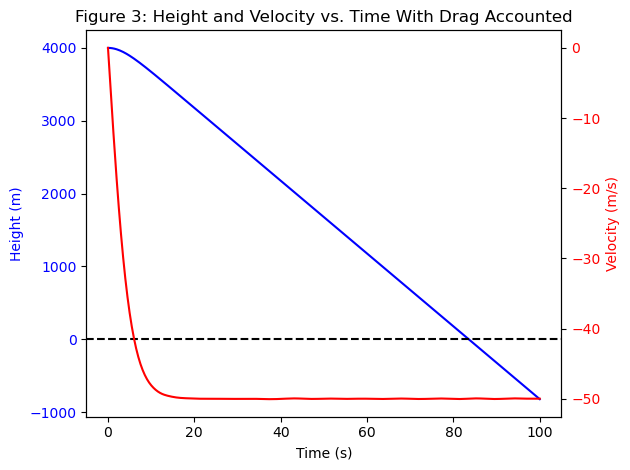

In [5]:
# 3 - plot with drag and coefficient:

tf2 = 100
tt2 = np.linspace(t0, tf2, 400)

alpha3 = g0 / (50**2)
gamma3 = 2

soln3 = solve_ivp(fun = d2ydt2_pt2, args=(alpha3, gamma3), t_span=(t0,tf2), t_eval=tt2, y0=[y0, v0], events=crash)

yy3 = soln3.y[0]
vv3 = soln3.y[1]

#print(solnp6)

fig, ax5 = plt.subplots()
ax6 = ax5.twinx()

ax5.plot(tt2, yy3, c="blue")
ax6.plot(tt2, vv3, c="red")
ax5.axhline(0, ls="--", c="black")

ax5.set_xlabel("Time (s)")

ax5.tick_params(axis="y", labelcolor="blue")
ax5.set_ylabel("Height (m)", color="blue")

ax6.tick_params(axis="y", labelcolor="red")
ax6.set_ylabel("Velocity (m/s)", color="red")

ax5.set_title("Figure 2: Height and Velocity vs. Time With Drag Accounted")
plt.tight_layout();

print(f"Accounting for drag as well, the test mass would reach the bottom at {soln3.t_events[0][0]} s")


### Part 3
---

Detected wall collisions:
Collision 1: time = 21.8872595212918 s, height (y) = 1650.3956116020026 m


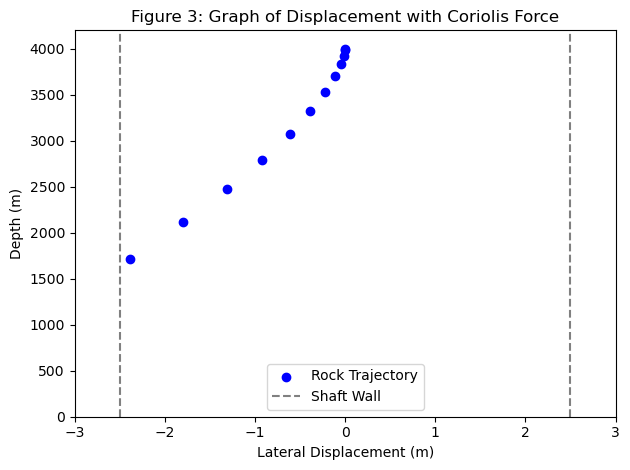

In [6]:
# 1 - Extend and update differential equations of y motion and add x motion:

#add new parameters:

omega = 7.2921e-5
x0 = 0
vx0 = 0 
shaft_rad = 2.5 #half of the shaft diameter (5 meters)

tt3 = np.linspace(t0, tf2, 52)

initial = [y0, x0, v0, vx0]

def pt3_coriolis(t, s, alpha, gamma):
    y, x, vy, vx = s
    a_gravity = -g(y)

    a_drag_x = -alpha * (np.abs(vx)**gamma) * np.sign(vx)
    a_drag_y = -alpha * (np.abs(vy)**gamma) * np.sign(vy)

    a_coriolis_x = 2 * omega * vy 
    a_coriolis_y = -2 * omega * vx 

    a_x = a_drag_x + a_coriolis_x
    a_y = a_gravity + a_drag_y + a_coriolis_y
    return [vy, vx, a_y, a_x] 

#Add wall collision event:

def wall_crash(t, s, alpha, gamma):
    return np.abs(s[1]) - shaft_rad

wall_crash.terminal = False  
wall_crash.direction = 0   

soln4 = solve_ivp(fun = pt3_coriolis, t_span=(t0,tf2), args=(alpha1, gamma1),  t_eval=tt3, 
                  y0=initial, events=(wall_crash,crash))

wall_times = soln4.t_events[0]
wall_states = soln4.y_events[0]  

yy4 = soln4.y[0] 
xx4 = soln4.y[1]

shaft_rad = 2.5 #Walls of shaft at x=-2.5 and x=2.5 meters

#2 & 3 - Plotting transverse position and interpreting results:

fig, ax7 = plt.subplots()
ax7.scatter(xx4, yy4, c="b", label = "Rock Trajectory")
ax7.axvline(shaft_rad, c="grey", linestyle="--", lw = 1.5, label="Shaft Wall")
ax7.axvline(-shaft_rad, c="grey", linestyle="--", lw = 1.5)
ax7.set_xlabel("Lateral Displacement (m)")
ax7.set_ylabel("Depth (m)")
ax7.set_title("Figure 3: Graph of Displacement with Coriolis Force")
ax7.set_xlim(-shaft_rad*1.2, shaft_rad*1.2)
ax7.set_ylim(0, 4200)
ax7.legend()

plt.tight_layout()

print("Detected wall collisions:")
for i, event_time in enumerate(wall_times):
    state_event = wall_states[i]
    # Report time and vertical position (height) when bump occurs:
    print(f"Collision {i+1}: time = {event_time} s, height (y) = {state_event[0]} m")


Detected wall collisions:
Collision 1: time = 29.589340677182605 s, height (y) = 2697.159041166841 m


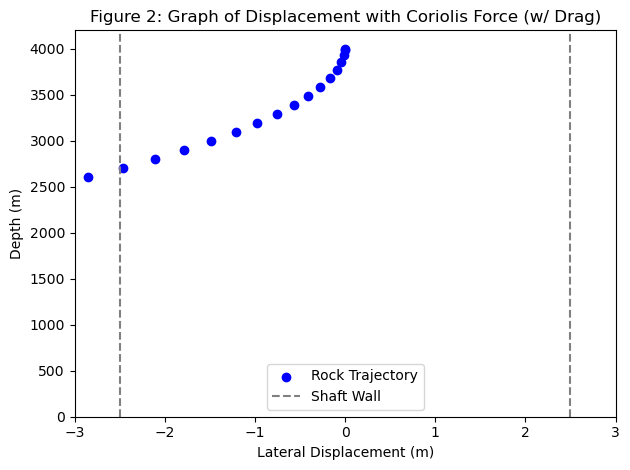

In [7]:
# 4 - Turning on drag and seeing the difference...

soln5 = solve_ivp(fun = pt3_coriolis, t_span=(t0,tf2), args=(alpha3, gamma3),  t_eval=tt3, 
                  y0=initial, events=(wall_crash,crash))

wall_times2 = soln5.t_events[0]
wall_states2 = soln5.y_events[0]

yy5 = soln5.y[0] 
xx5 = soln5.y[1]

fig, ax8 = plt.subplots()
ax8.scatter(xx5, yy5, c="b", label = "Rock Trajectory")
ax8.axvline(shaft_rad, c="grey", linestyle="--", lw = 1.5, label="Shaft Wall")
ax8.axvline(-shaft_rad, c="grey", linestyle="--", lw = 1.5)
ax8.set_xlabel("Lateral Displacement (m)")
ax8.set_ylabel("Depth (m)")
ax8.set_title("Figure 3: Graph of Displacement with Coriolis Force (w/ Drag)")
ax8.set_xlim(-shaft_rad*1.2, shaft_rad*1.2)
ax8.set_ylim(0, 4200)
ax8.legend()

plt.tight_layout()

print("Detected wall collisions:")
for i, event_time in enumerate(wall_times2):
    state_event = wall_states2[i]
    # Report time and vertical position (height) when bump occurs:
    print(f"Collision {i+1}: time = {event_time} s, height (y) = {state_event[0]} m")


#With drag, it hits even earlier!
    

### Part 4
---

The object reaches the other side of Earth at 2532.589551514292 s
The object reaches the center of Earth at 1266.9684333500077 s at speed 7910.495143250912 m/s


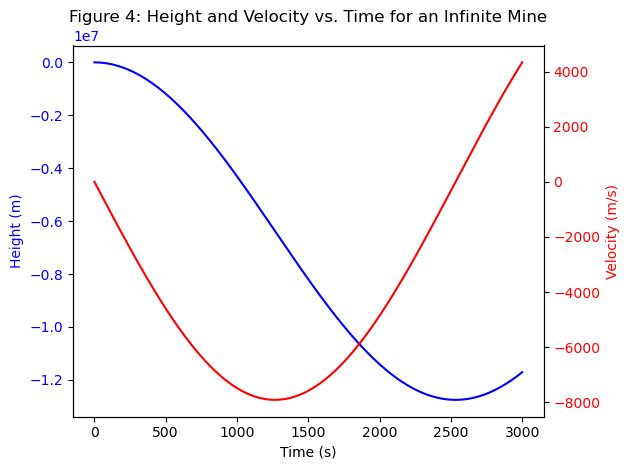

In [8]:
# 1 & 2 - Plotting Depth and Velocity for whole Earth Radius & Time & Velocity @ center

#Deifne a new time:

tf3 = 3000

tt4 = np.linspace(t0, tf3, 500)


def d2ydt2_pt4(t, s, alpha, gamma):
    y, v = s
    dydt = v
    dvdt = -g(y)+alpha*(np.abs(v))**gamma
    return [dydt, dvdt]

def center(t, s, alpha, gamma):
    return s[0] + R_earth

soln5 = solve_ivp(fun = d2ydt2_pt4, args=(alpha1, gamma1), t_span=(t0,tf3), t_eval=tt4, events=center, y0=[y0, v0])

yy5 = soln5.y[0]
vv5 = soln5.y[1] 

fig, ax9 = plt.subplots()
ax10 = ax9.twinx()

ax9.plot(tt4, yy5, c="blue")
ax10.plot(tt4, vv5, c="red")
ax9.set_xlabel("Time (s)")

ax9.tick_params(axis="y", labelcolor="blue")
ax9.set_ylabel("Height (m)", color="blue")

ax10.tick_params(axis="y", labelcolor="red")
ax10.set_ylabel("Velocity (m/s)", color="red")

ax9.set_title("Figure 4: Height and Velocity vs. Time for an Infinite Mine")
plt.tight_layout();

def end_inf(t, s, alpha, gamma):
    return s[1]

soln6 = solve_ivp(fun = d2ydt2_pt4, args=(alpha1, gamma1), t_span=(t0,tf3), t_eval=tt4, y0=[y0, v0], events=end_inf)

#print(2*R_earth)
#print(soln6)
print(f"The object reaches the other side of Earth at {soln6.t_events[0][1]} s")
print(f"The object reaches the center of Earth at {soln5.t_events[0][0]} s at speed {np.abs(soln5.y_events[0][0][1])} m/s")  

In [9]:
# 3 - Compare "crossing time" with orbital period

G = 6.6743e-11
M_earth = 5.972e24

v_orb = np.sqrt((G*M_earth)/R_earth)

P_orb = ((2*np.pi*R_earth)/v_orb)

#print(P_orb)
print(f'Compared to the "crossing time" {soln6.t_events[0][1]} s, the orbital period is \n{P_orb/soln6.t_events[0][1]} times greater at {P_orb} seconds.')

Compared to the "crossing time" 2532.589551514292 s, the orbital period is 
2.0016552609737706 times greater at 5069.371199675785 seconds.


### Part 5
---

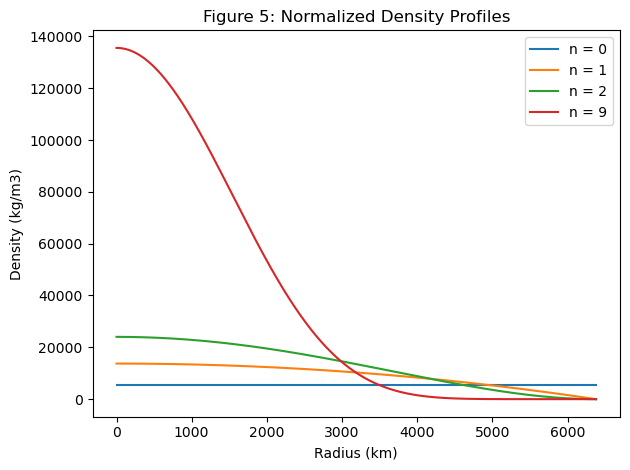

In [10]:
# 1 - Create and plot density profile:
from scipy.integrate import quad

n_values = [0, 1, 2, 9]

def density_profile(r, n, rho_n):
    return rho_n * (1 - (r**2)/(R_earth**2))**n

def p_n(n):
    integrand = lambda r: (1 - (r**2)/(R_earth**2))**n * r**2
    integral, _ = quad(integrand, 0, R_earth)
    rho_n = M_earth / (4 * np.pi * integral)
    return rho_n

fig, ax11 = plt.subplots()
r_vals = np.linspace(0, R_earth, 500)
for n in n_values:
    rho_n_val = p_n(n)
    dens = density_profile(r_vals, n, rho_n_val)
    ax11.plot(r_vals/1e3, dens, label=f"n = {n}")  # r in km
ax11.set_xlabel("Radius (km)")
ax11.set_ylabel("Density (kg/m3)")
ax11.set_title("Figure 5: Normalized Density Profiles")
ax11.legend()

fig.tight_layout()



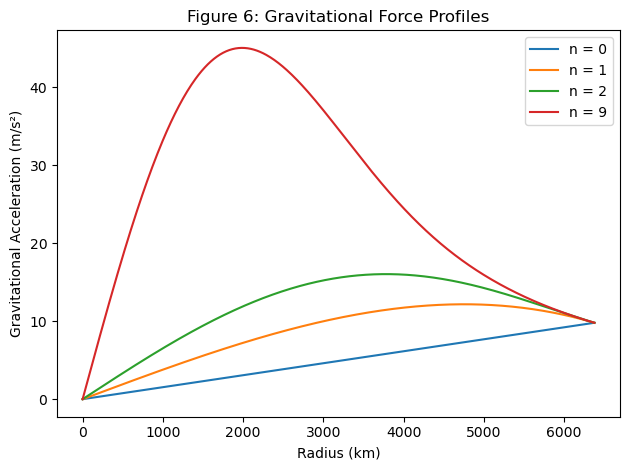

In [11]:
# 2:

fig, ax12 = plt.subplots()
r_threshold = 1.0  # meters
for n in n_values:
    rho_n_val = p_n(n)
    F_vals = []
    for r in r_vals:
        if r < r_threshold:
            # For small r
            if np.abs(r) < 1e-12:
                F_vals.append(0.0)
            else:
                rho0 = density_profile(0, n, rho_n_val)
                F_approx = (4.0 * np.pi / 3.0) * G * rho0 * r
                F_vals.append(F_approx)
        else:
            integrand = lambda r_prime: density_profile(r_prime, n, rho_n_val) * r_prime**2
            mass_inside, _ = quad(integrand, 0, r)
            mass_inside *= 4 * np.pi
            F_vals.append(G * mass_inside / (r**2))
    ax12.plot(r_vals/1e3, F_vals, label=f"n = {n}")
    
ax12.set_xlabel("Radius (km)")
ax12.set_ylabel("Gravitational Acceleration (m/s²)")
ax12.set_title("Figure 6: Gravitational Force Profiles")
ax12.legend()

fig.tight_layout()



n = 0: Time to center = 1267.343 (s), Speed at center = 7905.277 (m/s)
n = 1: Time to center = 1096.513 (s), Speed at center = 10457.699 (m/s)
n = 2: Time to center = 1035.076 (s), Speed at center = 12182.850 (m/s)
n = 9: Time to center = 943.778 (s), Speed at center = 18370.674 (m/s)


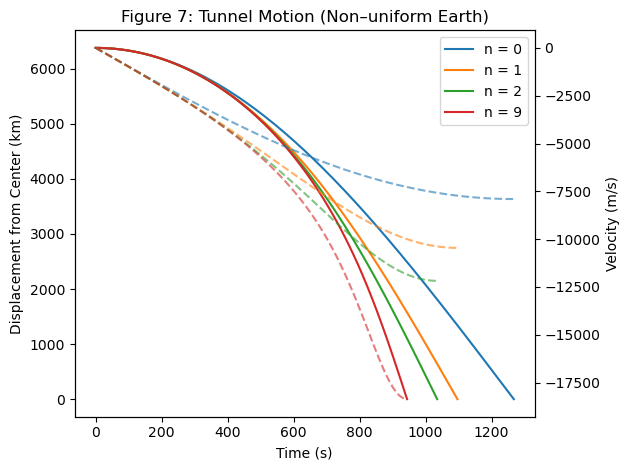

In [12]:
# 3 & 4: 

def m_inside(r, n, rho_n):
    if r < 1e-6:
        return 0.0
    integrand = lambda r_prime: density_profile(r_prime, n, rho_n) * r_prime**2
    mass, _ = quad(integrand, 0, r)
    return 4 * np.pi * mass

def nonuniform(t, X, n, rho_n):
    x, v = X
    r = abs(x)
    if r < 1e-6:
        a = 0.0
    else:
        mass_enclosed = m_inside(r, n, rho_n)
        a = -G * mass_enclosed / (r**2) * np.sign(x)
    return [v, a]

def center_event(t, X, *args):
    #using *args for any other arguments
    return X[0]
center_event.terminal = True
center_event.direction = -1

results = {}
t0_dyn = 0
t_final_dyn = 20000  # s

for n in n_values:
    rho_n_val = p_n(n)
    X0 = [R_earth, 0]  # release from the surface with zero initial velocity
    sol_dyn = solve_ivp(nonuniform, (t0_dyn, t_final_dyn), X0, args=(n, rho_n_val), dense_output=True, max_step=10, events=center_event)
    if sol_dyn.t_events[0].size > 0:
        t_center = sol_dyn.t_events[0][0]
        v_center = sol_dyn.sol(t_center)[1]
    else:
        t_center = None
        v_center = None
    results[n] = {'t_center': t_center, 'v_center': v_center, 'sol': sol_dyn}
    if t_center is not None:
        print(f"n = {n}: Time to center = {t_center:.3f} (s), Speed at center = {abs(v_center):.3f} (m/s)")

fig, ax13 = plt.subplots()
ax13.set_xlabel("Time (s)")
ax13.set_ylabel("Displacement from Center (km)")
ax13.set_title("Figure 7: Tunnel Motion (Non–uniform Earth)")
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

ax14 = ax13.twinx()
ax14.set_ylabel("Velocity (m/s)")

for i, n in enumerate(n_values):
    sol_dyn = results[n]['sol']
    color = colors[i % len(colors)]

    time = sol_dyn.t
    displacement_km = sol_dyn.y[0] / 1e3  # meters to km
    velocity = sol_dyn.y[1]  # already in m/s

    ax13.plot(time, displacement_km, label=f"n = {n}", color=color)
    ax14.plot(time, velocity, linestyle='--', color=color, alpha=0.6)

ax13.legend(loc="upper right")
fig.tight_layout()

### Part 6
---

In [13]:
# 1 - Compute time to get to center of moon via "infinite" mine: 

#First, determine the gravitational acceleration for the moon 

# g = GM/r^2
# ex:
g_earth = (G*M_earth)/(R_earth**2)
#print(g_earth) #gives an approximate value of Earth's gravitational acceleration

M_moon = 7.35e22
R_moon = 1.7381e6
g_moon = (G*M_moon)/(R_moon**2) 

#create same gravity function as on Earth:

def g_m(y):
    r = R_moon - 4000 + y
    return g_moon*(r/R_moon)

def d2ydt2_moon(t, s, alpha, gamma):
    y, v = s
    dydt = v
    dvdt = -g_m(y)+alpha*(np.abs(v))**gamma
    return [dydt, dvdt]

def center_moon(t, s, alpha, gamma):
    return s[0] + R_moon

soln7 = solve_ivp(fun=d2ydt2_moon, args=(alpha1, gamma1), t_span=(t0,tf3), 
                  t_eval=tt4, y0=[y0, v0], events=center_moon)
#print(soln7)
print(f"The object reaches the center of Moon at {soln7.t_events[0][0]} s")

The object reaches the center of Moon at 1627.3076130513666 s


In [14]:
#2 - Comparisons of Densities (Earth vs Moon):

#Assuming Earth and Moon are perfect spheres

PEarth = M_earth/((4/3)*np.pi*(R_earth**3))
PMoon = M_moon/((4/3)*np.pi*(R_moon**3))

print(f"Earth's Density: {PEarth:.4f} kg/m^3")
print(f"Moon's Density: {PMoon:.4f} kg/m^3")
print(f"Density ratio (Moon/Earth): {PMoon / PEarth}")

Earth's Density: 5494.8674 kg/m^3
Moon's Density: 3341.7538 kg/m^3
Density ratio (Moon/Earth): 0.6081591337511927


In [15]:
# 3 - Relationship between free-fall (tunnel) period and density:

# For a uniform sphere, surface gravity: g0 = (4/3)π G ρ R.
# Then, ω = sqrt(g0 / R) = sqrt((4/3)π G ρ) and T = 2π/ω.
# Thus, T ∝ 1/√ρ.

T_free_earth = 2*np.pi / np.sqrt((4/3)*np.pi*G*PEarth)
T_free_moon  = 2*np.pi / np.sqrt((4/3)*np.pi*G*PMoon)
print(f"Expected full free-fall period (Earth, uniform): {T_free_earth}")
print(f"Expected full free-fall period (Moon, uniform): {T_free_moon}")
print(f"These results confirm that fall time scales as 1/√(density).")

Expected full free-fall period (Earth, uniform): 5069.371199675784
Expected full free-fall period (Moon, uniform): 6500.480746965868
These results confirm that fall time scales as 1/√(density).
